# Calcolo delle extended pareto grid
Lavoriamo sul toro piatto $T=[0,2\pi]\times[0,2\pi]/(x,0)=(x,2\pi),(0,y)=(2\pi,y)$, pertanto lavoriamo con funzioni $\mathbb{R}^2\rightarrow \mathbb{R}^2$ periodiche in entrambe le variabili.

Per il momento abbiamo fatto degli esempi con funzioni polinomiali in seno e coseno (per esempio del tipo $(f_1(x,y),f_2(x,y))=(a\ cos(x)^2+b\ cos(y)\ ,\ c\ sin(x)^3+d\ sin(y)^2)$).

NOTA: per il momento nelle nostre EPG non ci sono le semirette emananti dai punti critici, avrebbero fatto confusione a questo punto del lavoro.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
import numdifftools as nd

### Setting:
##### Costruiamo una griglia di punti sul toro, tutte le funzioni veranno valutate su questi. Questa può essere raffinata a piacimento e al momento contiene 10.000 punti.

##### Chiaramente alcuni punti importanti potrebbero essere esclusi, ma ammettendo una certa tolleranza siamo riusciti ad ottenere un risultato abbastanza buono.

Un diverso approccio, quello che abbiamo provato all'inizio, potrebbe essere quello di non creare la griglia e trattare le nostre funzioni con metodi della libreria numdifftools (per esempio per trovare gli zeri dei gradienti); il problema è che questi metodi sono molto costosi e non si adattano nemmeno troppo bene.

In [32]:
#griglia sul toro su cui facciamo i conti

eps=2*np.pi/100
x=[]
for i in np.arange(0,2*np.pi+eps,eps):
    for j in np.arange(0,2*np.pi+eps,eps):
        x.append([i,j])
x=np.array(x)
l=len(x)

### Calcolo punti Pareto Critici
Un punto $(x,y)\in T$ è detto Pareto Critico se $\exists \lambda\le 0$ t.c. $\nabla f_1(x,y)=\lambda\nabla f_2(x,y)$.

Questa condizione equivale a richiedere che:

se $\nabla f_1(x,y)=(a_0,a_1),\ \nabla f_2(x,y)=(b_0,b_1)$, allora $a_0=\lambda b_0$ e $a_1=\lambda b_1$, quindi $\frac{a_0}{b_0}=\lambda=\frac{a_1}{b_1}$ dove queste sono ben definite.

Pertanto valuto questi rapporti, ammettendo una certa tolleranza, e tratto da parte i casi in cui questo non è ben definito.

Dall'articolo: assumiamo per ipotesi che siano finiti e disgiunti l'insieme dei punti critici di $f_1$ e l'insieme dei punti critici di $f_2$, ma in realtà nei due esempi sotto la condizione non è soddisfatta.

Note: al momento per calcolare i gradienti utilizziamo un metodo della libreria numdifftools ([documentazione](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html#numpy-gradient)); Eloy si sta occupando di creare una classe .py specifica che tratti in modo efficiente le funzioni polinomiali che stiamo considerando. In linea di principio, al momento, il nostro programma può trattare qualsiasi tipo di funzione sul toro.

In [33]:
def Pareto(f_1,f_2,tol):
    #per ora uso una sola toleranza, come se fosse il mio zero
    cr1=[]  #lista dei punti critici di f_1
    cr2=[]  #lista dei punti critici di f_2
    ppc=[]  #lista dei punti Pareto Critici
    for i in range (0,l,1):
        a=nd.Gradient(f_1)(x[i])
        b=nd.Gradient(f_2)(x[i])
        if a[0]==0 and a[1]==0:       #se ho un punto critico per f_1 la condizione è verificata per qualunque valore del gradiente di f_2
            cr1.append(x[i])
            ppc.append(x[i])
        if b[0]==0 and b[1]==0:     #se ho un punto critico per f_2 la condizione è verificata per qualunque valore del gradiente di f_1
            cr2.append(x[i])
            ppc.append(x[i])
        if a[0]==0 and a[1]!=0:     
            if abs(b[0])<=tol and b[1]/a[1]<=tol:
                ppc.append(x[i])
        if a[1]==0 and a[0]!=0:
            if abs(b[1])<=tol and b[0]/a[0]<=tol:
                ppc.append(x[i])
        if b[0]==0 and b[1]!=0:
            if abs(a[0])<=tol and a[1]/b[1]<=tol:
                ppc.append(x[i])
        if b[1]==0 and b[0]!=0:
            if abs(a[1])<=tol and a[0]/b[0]<=tol:
                ppc.append(x[i])
        if b[0]!=0 and b[1]!=0:
             if abs(a[0]/b[0]-a[1]/b[1])<=tol and (a[0]/b[0]<=tol or a[1]/b[1]<=tol):
                 ppc.append(x[i])
    ppc=np.array(ppc)
    cr1=np.array(cr1)
    cr2=np.array(cr2)
    return ppc,cr1,cr2

In [62]:
def ParetoTol(f_1,f_2,tol):
    #per ora uso una sola toleranza, come se fosse il mio zero
    ppc=[]  #lista dei punti Pareto Critici
    
    for i in range (0,l,1):
        a=nd.Gradient(f_1)(x[i])
        b=nd.Gradient(f_2)(x[i])
        if abs(a[0])<=tol and abs(a[1])<=tol:       #se ho un punto critico per f_1 la condizione è verificata per qualunque valore del gradiente di f_2
            ppc.append(x[i])
        if abs(b[0])<=tol and abs(b[1])<=tol:     #se ho un punto critico per f_2 la condizione è verificata per qualunque valore del gradiente di f_1
            ppc.append(x[i])
        if abs(a[0])<=tol and abs(a[1])>tol:     
            if abs(b[0])<=tol and b[1]/a[1]<=tol:
                ppc.append(x[i])
        if abs(a[1])<=tol and abs(a[0])>tol:
            if abs(b[1])<=tol and b[0]/a[0]<=tol:
                ppc.append(x[i])
        if abs(b[0])<=tol and abs(b[1])>tol:
            if abs(a[0])<=tol and a[1]/b[1]<=tol:
                ppc.append(x[i])
        if abs(b[1])<=tol and abs(b[0])>tol:
            if abs(a[1])<=tol and a[0]/b[0]<=tol:
                ppc.append(x[i])
        if abs(b[0])>tol and abs(b[1])>tol:
             if abs(a[0]/b[0]-a[1]/b[1])<=tol and (a[0]/b[0]<=tol or a[1]/b[1]<=tol):
                 ppc.append(x[i])
    ppc=np.array(ppc)
    return ppc

# Primo Esempio:

$f=(f_1,f_2)$ con $f_1(x,y)=cos\ x\ \ \ ,\ f_2(x,y)=cos\ y$

$\nabla f_1(x,y)=(sen\ x,0)\ ,\ \nabla f_2(x,y)=(0,sen\ y)$

###### Nota: in questo esempio i punti critici sono infiniti

In [35]:
def f_1(x):
    return np.cos(x[0])

def f_2(x):
    return np.cos(x[1])

In [36]:
# applichiamo la funzione creata sopra per ottenere i punti critici e i punti pareto critici

Pareto0,cr1,cr2=Pareto(f_1,f_2,0)

### Calcolo i punti critici:
Questa parte non è necessaria, ma l'ho inserita per due motivi:

1. facciamo un primo controllo per vedere se ha senso quello che stiamo facento
2. sappiamo che i valori critici sono gli estremi degli archi della EPG, quindi faccio un primo plot per avere un'idea di come è disposta nel piano l'EPG

Text(0.5, 1.0, 'Immagini dei Punti Critici - Tolleranza=0')

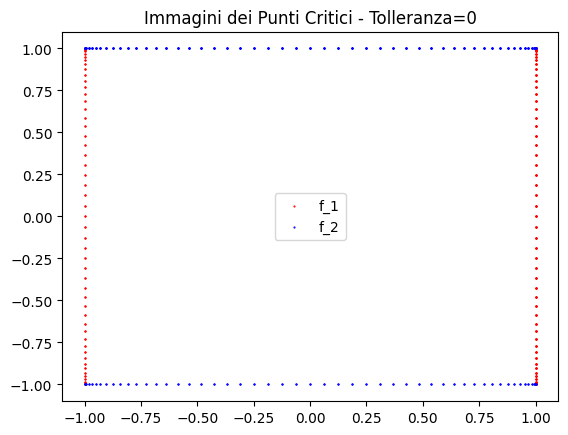

In [37]:
plt.scatter([f_1(c) for c in cr1],[f_2(c) for c in cr1],color='red',s=0.3,label='f_1')
plt.scatter([f_1(c) for c in cr2],[f_2(c) for c in cr2],color='blue',s=0.3,label='f_2')
plt.legend(loc="center")
plt.title('Immagini dei Punti Critici - Tolleranza=0')

### Cosa mi aspetto:
Per la funzione $f(x,y)=(cos\ x,cos\ y)$, con tolleranza 0, come punti Pareto Critici dovrebbero venire fuori tutti e soli i punti critici di $f_1$ e $f_2$.

Text(0.5, 1.0, 'Extended Pareto Grid di f - Tolleranza=0')

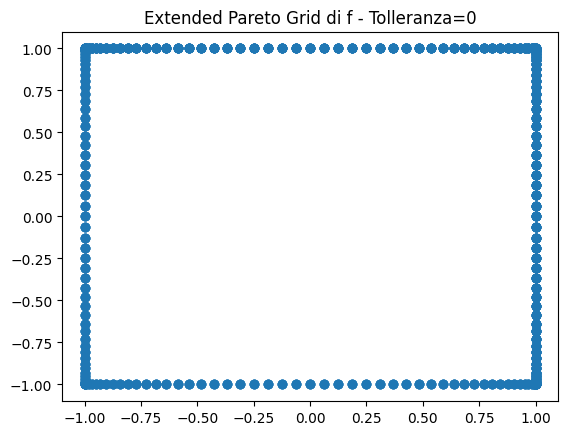

In [38]:
plt.scatter([f_1(p) for p in Pareto0],[f_2(p) for p in Pareto0])
plt.title('Extended Pareto Grid di f - Tolleranza=0')

Questo esempio era estremamente banale, quindi il risultato coincide con le aspettative; non faccio altre prove di tolleranza

# Secondo Esempio:
$g_1(x,y)=2 cos^2\ x+4\ cos\ y\ \ \ ,\ g_2(x,y)=sin^3\ x+3\ sin^2\ y$

$\nabla g_1=(-4 cos\ x\ sen\ x,\ -4 sen\ y),\ \nabla g_2=(3 cos\ x\ sen^2\ x,6 cos\ y \ sen\ y)$

###### Nota: gli insiemi dei punti critici di $f_1$ e $f_2$ non sono disgiunti

In [39]:
def g_1(x):
    return 2*np.cos(x[0])**2+4*np.cos(x[1])

def g_2(x):
    return 1*np.sin(x[0])**3+3*np.sin(x[1])**2

In [63]:
pareto0,gcr1,gcr2=Pareto(g_1,g_2,0)
pareto20=ParetoTol(g_1,g_2,0)

Text(0.5, 1.0, 'Immagini dei Punti Critici - Tolleranza=0')

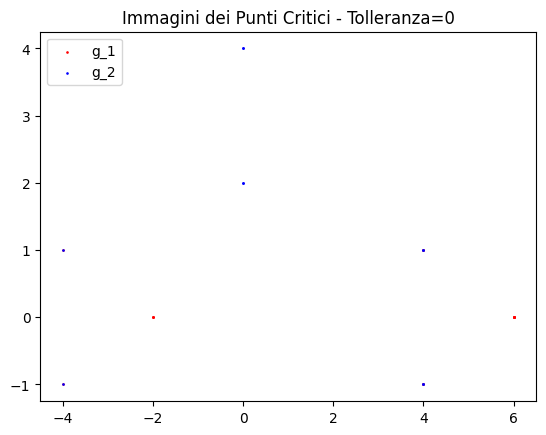

In [41]:
plt.scatter([g_1(c) for c in gcr1],[g_2(c) for c in gcr1],color='red',s=0.8,label='g_1')
plt.scatter([g_1(c) for c in gcr2],[g_2(c) for c in gcr2],color='blue',s=0.8,label='g_2')
plt.legend(loc="upper left")
plt.title('Immagini dei Punti Critici - Tolleranza=0')

Text(0.5, 1.0, 'Extended Pareto Grid di g - Tolleranza=0')

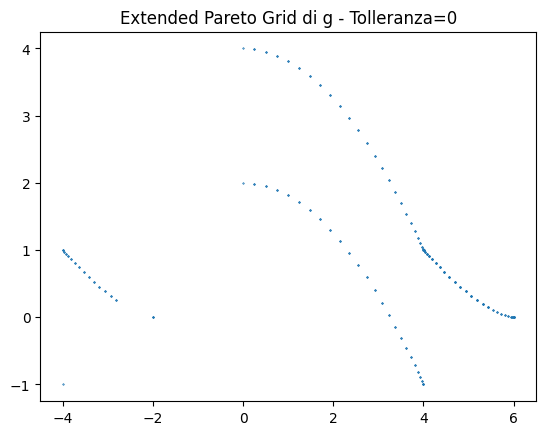

In [42]:
plt.scatter([g_1(p) for p in pareto0],[g_2(p) for p in pareto0],s=0.1)
plt.title('Extended Pareto Grid di g - Tolleranza=0')

Osservazione: facendo i conti a mano, mi risulta che la EPG di $g$ sia 
$\{ (2 cos^2\ x+2 sen\ x,\ 8 cos^3\ y+3 sen^2\ y)\ |\ x\in [\pi,2\pi],\ y\in [\frac{\pi}{2},\frac{3\pi}{2}]\}\cup \{(4cos\ y,1+3sen^2\ y)\ |\ y\in [\frac{\pi}{2},\frac{3\pi}{2}]\}\cup \{(4cos\ y,3sen^2\ y-1)\ |\ y\in [\frac{\pi}{2},\frac{3\pi}{2}]\} \cup \{(2+4cos\ y,3sen^2\ y)\ |\ y\in [\frac{\pi}{2},\frac{3\pi}{2}]\}\cup\{(2cos^2\ x+4,sen^3)\ x\ |\ x\in [\pi,2\pi]\}\cup\{(2cos^2\ x-4,sen^3)\ x\ |\ x\in [\pi,2\pi]\}$. 

Quindi non mi torna questa EPG: per esempio dovrebbe contenere il punto $(2,-8)$.

Provo ad aumentare la tolleranza. Non faccio il plot dei punti critici perchè sono gli stessi (per quesi, per ora, tolleranza 0)

In [64]:
#tolleranza=0.1
pareto01,gcr1,gcr2=Pareto(g_1,g_2,0.1)
pareto201=ParetoTol(g_1,g_2,0.1)

Text(0.5, 1.0, 'Extended Pareto Grid di g - Tolleranza=0.1')

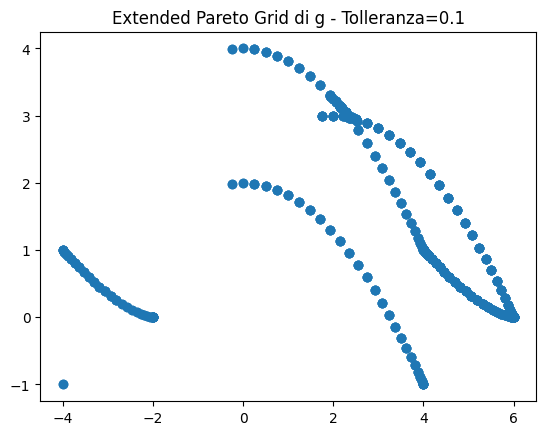

In [44]:
plt.scatter([g_1(p) for p in pareto01],[g_2(p) for p in pareto01])
plt.title('Extended Pareto Grid di g - Tolleranza=0.1')

In [65]:
#tolleranza=1
pareto1,gcr1,gcr2=Pareto(g_1,g_2,1)
pareto21=ParetoTol(g_1,g_2,1)

In [46]:
#Testing: siccome mancano alcuni punti nel plot verifico se è un problema del plot (capita che non faccia vedere dei punti) o del programma
doc = open("list_pareto_crit_points.txt","w")
doc.write("Punti della EPG:" + '\n')
for p in pareto01:
    doc.write(str(g_1(p)) + ' ' + str(g_2(p))+'\n')
doc.close

<function TextIOWrapper.close()>

Text(0.5, 1.0, 'Extended Pareto Grid di g - Tolleranza=1')

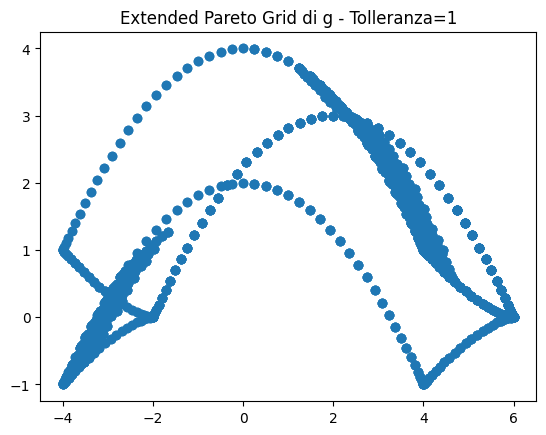

In [47]:
plt.scatter([g_1(p) for p in pareto1],[g_2(p) for p in pareto1])
plt.title('Extended Pareto Grid di g - Tolleranza=1')

Adosso provo a plottare quanto emerge dai conti per vedere quanto è lontano il nostro risultato dalla realtà.

C:\Users\ragog\AppData\Local\Temp\ipykernel_4940\1056827110.py:32: RuntimeWarning: invalid value encountered in arcsin
  plt.scatter([g_1([np.arcsin(2*np.cos(i)),i]) for i in punti2],[g_2([np.arcsin(2*np.cos(i)),i]) for i in punti2],s=0.8,color='blue')


Text(0.5, 1.0, 'Extended Pareto Grid - calcolata a mano')

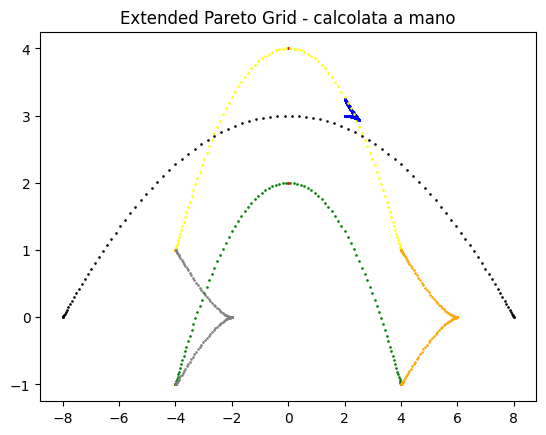

In [48]:
def p1(x):
    return 4*np.cos(x)
def p2(x):
    return 2*4*np.cos(x)
def q1(x):
    return 1+3*np.sin(x)**2
def q2(x):
    return 3*np.sin(x)**2-1
def q3(x):
    return 3*np.sin(x)**2
def pp1(x):
    return 4+2*np.cos(x)**2
def pp2(x):
    return 2*np.cos(x)**2-4
def q(x):
    return np.sin(x)**3

x=np.linspace(0,np.pi,100)
y=np.concatenate([np.linspace(0,np.pi/2,50),np.linspace(3*np.pi/2,2*np.pi,50)])
punti=[]

for i in range(0,len(x),1):
    for j in range(0,len(x),1):
        punti.append([x[i],y[j]])

punti=np.array(punti)
punti2=np.concatenate([np.linspace(np.pi/3,np.pi/2,500),np.linspace(3*np.pi/2,5*np.pi/3,500)])


plt.scatter([g_1(c) for c in gcr1],[g_2(c) for c in gcr1],s=0.8,color='red')
plt.scatter([g_1(c) for c in gcr2],[g_2(c) for c in gcr2],s=0.8,color='red')
plt.scatter([g_1([np.arcsin(2*np.cos(i)),i]) for i in punti2],[g_2([np.arcsin(2*np.cos(i)),i]) for i in punti2],s=0.8,color='blue')
plt.scatter([p1(i) for i in x],[q1(i) for i in y],s=0.8,color='yellow')
plt.scatter([p1(i) for i in x],[q2(i) for i in y],s=0.8,color='green')
plt.scatter([p2(i) for i in x],[q3(i) for i in y],s=0.8,color='black')
plt.scatter([pp1(i) for i in x],[q(i) for i in y],s=0.8,color='orange')
plt.scatter([pp2(i) for i in x],[q(i) for i in y],s=0.8,color='grey')


plt.title('Extended Pareto Grid - calcolata a mano')

## Considerazioni Finali:

1. con tolleranza=0 chiaramente una grande parte della EPG non si vede, ma mi sembra ragionevole
2. con tolleranza=0.1 la situazione migliora, ma 0.1 è un valore abbastanza alto e il risultato non è poi così soddisfacente
3. con tolleranza=1, altissima, otteniamo tutta la parte centrale, abbiamo però aggiunto parecchio rumore
4. in ognuno dei casi precedenti però mancano:

    4.1. l'arco che connette i punti (-8,0) e (8,0); il test con il file txt è fallito, quei punti proprio non li considera, bisogna capire il motivo
    
    4.2. la zona che in quest'ultimo grafico è blu: forse in questo caso c'è un errore concettuale di matematica, infatti stando ai risultati teorici l'EPG dovrebbe risultare un insieme di archi, mentre l'insieme che corrisponde a questa zona, $\{ (2 cos^2\ x+2 sen\ x,\ 8 cos^3\ y+3 sen^2\ y)\ |\ x\in [\pi,2\pi],\ y\in [\frac{\pi}{2},\frac{3\pi}{2}]\}$, è un rettangolo pieno.

In [49]:
def g_1_1(z):
    return [-4*np.sin(z[0])*np.cos(z[0]),-4**np.sin(z[1])]

def g_2_1(z):
    return [3*np.cos(z[0])*(np.sin(z[0])**2),2*np.cos(z[1])*np.sin(z[1])]

In [50]:
eps=2*np.pi/100
x=[]
for i in np.arange(0,2*np.pi+eps,eps):
    for j in np.arange(0,2*np.pi+eps,eps):
        x.append([i,j])
x=np.array(x)
l=len(x)

In [66]:
def ParetoTest(tol):
    #per ora uso una sola toleranza, come se fosse il mio zero
    ppc=[]  #lista dei punti Pareto Critici
    
    for i in range (0,l,1):
        a=g_1_1(x[i])
        b=g_2_1(x[i])
        if abs(a[0])<=tol and abs(a[1])<=tol:       #se ho un punto critico per f_1 la condizione è verificata per qualunque valore del gradiente di f_2
            ppc.append(x[i])
        if abs(b[0])<=tol and abs(b[1])<=tol:     #se ho un punto critico per f_2 la condizione è verificata per qualunque valore del gradiente di f_1
            ppc.append(x[i])
        if abs(a[0])<=tol and abs(a[1])>tol:     
            if abs(b[0])<=tol and b[1]/a[1]<=tol:
                ppc.append(x[i])
        if abs(a[1])<=tol and abs(a[0])>tol:
            if abs(b[1])<=tol and b[0]/a[0]<=tol:
                ppc.append(x[i])
        if abs(b[0])<=tol and abs(b[1])>tol:
            if abs(a[0])<=tol and a[1]/b[1]<=tol:
                ppc.append(x[i])
        if abs(b[1])<=tol and abs(b[0])>tol:
            if abs(a[1])<=tol and a[0]/b[0]<=tol:
                ppc.append(x[i])
        if abs(b[0])>tol and abs(b[1])>tol:
             if abs(a[0]/b[0]-a[1]/b[1])<=tol and (a[0]/b[0]<=tol or a[1]/b[1]<=tol):
                 ppc.append(x[i])
    ppc=np.array(ppc)
    return ppc

In [54]:
def ParetoTest2(tol):
    #per ora uso una sola toleranza, come se fosse il mio zero
    ppc=[]  #lista dei punti Pareto Critici
    
    for i in range (0,l,1):
        a=g_1_1(x[i])
        b=g_2_1(x[i])
        if a[0]==0 and a[1]==0:       #se ho un punto critico per f_1 la condizione è verificata per qualunque valore del gradiente di f_2
            ppc.append(x[i])
        if b[0]==0 and b[1]==0:     #se ho un punto critico per f_2 la condizione è verificata per qualunque valore del gradiente di f_1
            ppc.append(x[i])
        if a[0]==0 and a[1]!=0:     
            if abs(b[0])<=tol and b[1]/a[1]<=tol:
                ppc.append(x[i])
        if a[1]==0 and a[0]!=0:
            if abs(b[1])<=tol and b[0]/a[0]<=tol:
                ppc.append(x[i])
        if b[0]==0 and b[1]!=0:
            if abs(a[0])<=tol and a[1]/b[1]<=tol:
                ppc.append(x[i])
        if b[1]==0 and b[0]!=0:
            if abs(a[1])<=tol and a[0]/b[0]<=tol:
                ppc.append(x[i])
        if b[0]!=0 and b[1]!=0:
             if abs(a[0]/b[0]-a[1]/b[1])<=tol and (a[0]/b[0]<=tol or a[1]/b[1]<=tol):
                 ppc.append(x[i])
    ppc=np.array(ppc)
    return ppc

In [67]:
paretotest0=ParetoTest(0)
paretotest01=ParetoTest(0.1)
paretotest1=ParetoTest(1)
paretotest20=ParetoTest2(0)
paretotest201=ParetoTest2(0.1)
paretotest21=ParetoTest2(1)

Text(0.5, 1.0, 'gradienti veri : tol=1 : tol=1')

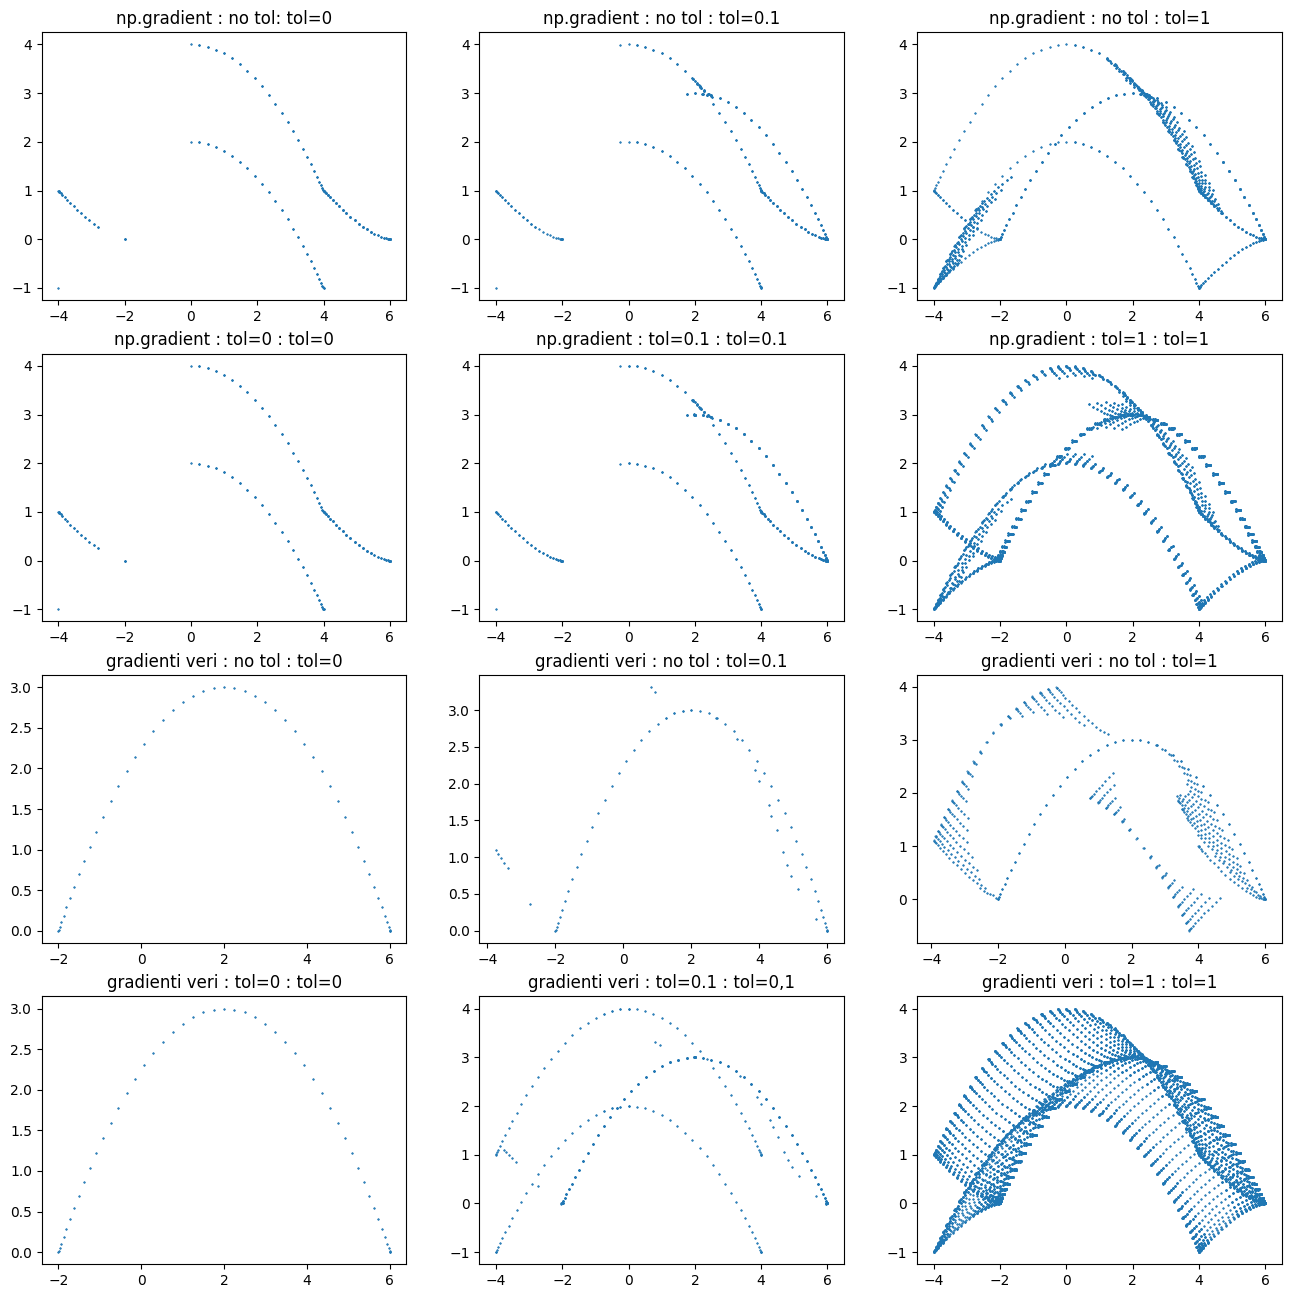

In [71]:
fig,axes=plt.subplots(4,3)
fig.set_size_inches(16,16)
axes[0,0].scatter([g_1(p) for p in pareto0],[g_2(p) for p in pareto0],s=0.2)
axes[0,0].set_title('np.gradient : no tol: tol=0')
axes[0,1].scatter([g_1(p) for p in pareto01],[g_2(p) for p in pareto01],s=0.2)
axes[0,1].set_title('np.gradient : no tol : tol=0.1')
axes[0,2].scatter([g_1(p) for p in pareto1],[g_2(p) for p in pareto1],s=0.2)
axes[0,2].set_title('np.gradient : no tol : tol=1')
axes[1,0].scatter([g_1(p) for p in pareto20],[g_2(p) for p in pareto20],s=0.2)
axes[1,0].set_title('np.gradient : tol=0 : tol=0')
axes[1,1].scatter([g_1(p) for p in pareto201],[g_2(p) for p in pareto201],s=0.2)
axes[1,1].set_title('np.gradient : tol=0.1 : tol=0.1')
axes[1,2].scatter([g_1(p) for p in pareto21],[g_2(p) for p in pareto21],s=0.2)
axes[1,2].set_title('np.gradient : tol=1 : tol=1')
axes[2,0].scatter([g_1(p) for p in paretotest20],[g_2(p) for p in paretotest20],s=0.2)
axes[2,0].set_title('gradienti veri : no tol : tol=0')
axes[2,1].scatter([g_1(p) for p in paretotest201],[g_2(p) for p in paretotest201],s=0.2)
axes[2,1].set_title('gradienti veri : no tol : tol=0.1')
axes[2,2].scatter([g_1(p) for p in paretotest21],[g_2(p) for p in paretotest21],s=0.2)
axes[2,2].set_title('gradienti veri : no tol : tol=1')
axes[3,0].scatter([g_1(p) for p in paretotest0],[g_2(p) for p in paretotest0],s=0.2)
axes[3,0].set_title('gradienti veri : tol=0 : tol=0')
axes[3,1].scatter([g_1(p) for p in paretotest01],[g_2(p) for p in paretotest01],s=0.2)
axes[3,1].set_title('gradienti veri : tol=0.1 : tol=0,1')
axes[3,2].scatter([g_1(p) for p in paretotest1],[g_2(p) for p in paretotest1],s=0.2)
axes[3,2].set_title('gradienti veri : tol=1 : tol=1')